In [61]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns # import seaborn for visualization of data
%matplotlib inline
import matplotlib.pyplot as plt#
from datetime import datetime


In [5]:

# read teh two csv files given. Take care of the separator.
df = pd.read_csv('data_train.csv',sep = ',')
df_weather = pd.read_csv('weather.csv',sep = ',')

In [7]:
# Check the shape of the data
df.shape, df_weather.shape


((1743, 15), (2106, 9))

In [13]:
df.tail(5)

,date,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,school_holiday,feature_8,feature_9,feature_10,label
1738,2009-12-27,0,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,1524
1739,2009-12-28,0,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,1542
1740,2009-12-29,0,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,1922
1741,2009-12-30,0,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,1576
1742,2009-12-31,0,0,0,0,4.6,7.6,2.6,4.6,0,3,0,0,0,392


In [18]:
# Make the datetime as index
df.set_index('date', inplace=True) 
df.head()

,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,school_holiday,feature_8,feature_9,feature_10,label
date,,,,,,,,,,,,,,
2005-03-20,0,0,0,0,3.2,6.7,1.7,3.7,0,0,0,0,0,915
2005-03-21,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1057
2005-03-22,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1482
2005-03-23,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1883
2005-03-24,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1790


In [19]:
# Make the datetime as index
df_weather.set_index('date', inplace=True)
df_weather.head(5)

,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
date,,,,,,,,
2005-03-20,69.0,8.9,4.4,0.2,0.0,0,11.1,7.6
2005-03-21,58.0,13.2,6.2,-0.3,0.0,0,11.3,9.7
2005-03-22,52.0,18.0,10.6,3.0,3.3,0,8.6,9.2
2005-03-23,79.0,17.6,12.5,7.2,0.0,0,8.4,8.2
2005-03-24,71.0,20.1,13.3,6.4,4.3,0,7.9,8.6


In [22]:
# I will concatenate the two data sets 
result = pd.concat([df, df_weather], axis=1)
result.tail(3)


,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,school_holiday,...,feature_10,label,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
date,,,,,,,,,,,,,,,,,,,,,
2010-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,19,NaN,NaN
2010-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,19,NaN,NaN
2010-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.7,18,NaN,NaN


In [34]:
# Now i clean the rows from NaN
result.dropna(how = 'any', inplace = True)

In [24]:
result.head(2)

,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,school_holiday,...,feature_10,label,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
date,,,,,,,,,,,,,,,,,,,,,
2005-03-20,0.0,0.0,0.0,0.0,3.2,6.7,1.7,3.7,0.0,0.0,...,0.0,915.0,69.0,8.9,4.4,0.2,0.0,0,11.1,7.6
2005-03-21,0.0,0.0,0.0,0.0,3.2,6.7,1.7,3.7,0.0,3.0,...,0.0,1057.0,58.0,13.2,6.2,-0.3,0.0,0,11.3,9.7


In [67]:
result.drop(columns=['feature_8', 'feature_9'],inplace=True)

In [69]:
# Check for NaN values that will cause us problems
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1728 entries, 2005-03-20 to 2009-12-31
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bank_holiday                1728 non-null   float64
 1   feature_0                   1728 non-null   float64
 2   feature_1                   1728 non-null   float64
 3   feature_2                   1728 non-null   float64
 4   feature_3                   1728 non-null   float64
 5   feature_4                   1728 non-null   float64
 6   feature_5                   1728 non-null   float64
 7   feature_6                   1728 non-null   float64
 8   feature_7                   1728 non-null   float64
 9   school_holiday              1728 non-null   float64
 10  feature_10                  1728 non-null   float64
 11  label                       1728 non-null   float64
 12  air_humidity                1728 non-null   float64
 13  air_temperature_daily_m

EDA : Go through the data and see correlations

In [82]:
for i in result.columns:
    print(f'Feature {i} has these unique values {result[i].unique()}.')

Feature bank_holiday has these unique values [0. 3. 2.].
Feature feature_0 has these unique values [0. 1.].
Feature feature_1 has these unique values [0. 1.].
Feature feature_2 has these unique values [0. 1.].
Feature feature_3 has these unique values [3.2 4.3 4.6].
Feature feature_4 has these unique values [6.7 7.3 7.6].
Feature feature_5 has these unique values [1.7 2.3 2.6].
Feature feature_6 has these unique values [3.7 4.3 4.6].
Feature feature_7 has these unique values [0. 1.].
Feature school_holiday has these unique values [0. 3. 1. 2.].
Feature feature_10 has these unique values [0. 1.].
Feature label has these unique values [ 915. 1057. 1482. ... 1524. 1922.  392.].
Feature air_humidity has these unique values [ 69.  58.  52.  79.  71.  89.  91.  86.  66.  55.  49.  44.  40.  65.
  75.  82.  74.  72.  84.  54.  57.  78.  88.  95.  85.  90.  87.  81.
  77.  67.  68.  73.  64.  59.  83.  93.  70.  76.  63.  62.  60.  80.
  61.  94.  92.  97.  96.  98.  99. 100.  53.  51.  47.  3

<AxesSubplot:>

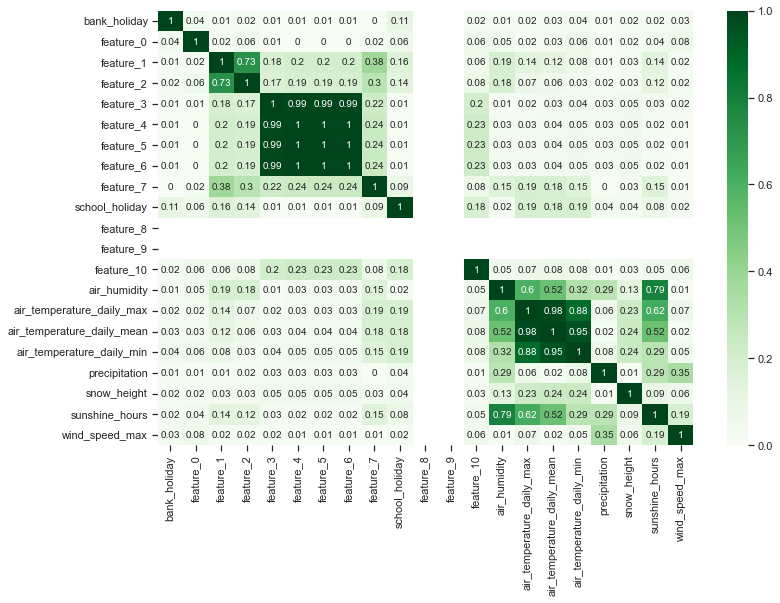

In [83]:
from sklearn.model_selection import train_test_split
ax = plt.figure(figsize=(12,8))
pearsoncorr = X_train.corr(method='pearson')
sns.heatmap(abs(round(pearsoncorr,2)), xticklabels = pearsoncorr.columns, yticklabels=pearsoncorr.columns,
            cmap = 'Greens', annot=True)


In [58]:
result['bank_holiday'].unique()  # 


array([0., 3., 2.])

In [51]:
result['feature_0'].unique()  #### Feature 0-10 are 0 and 1 so they do not go through FE

array([0., 1.])

<AxesSubplot:xlabel='date', ylabel='label'>

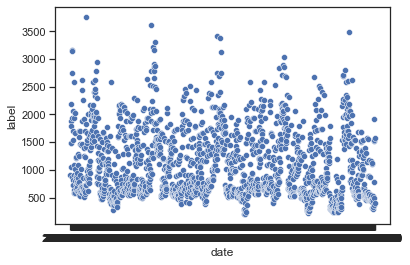

In [36]:
# See what we expect to predict.
sns.scatterplot(x = result.index, y =result['label'])

# From the result I see that we have a regression problem with time periodicity.

In [31]:
# I will import sklearn for the polynomial and Linear Regression model
# I will also need the Random Forest to check if it is  better model for the features.

date
2005-03-20     915.0
2005-03-21    1057.0
2005-03-22    1482.0
2005-03-23    1883.0
2005-03-24    1790.0
               ...  
2010-12-27       NaN
2010-12-28       NaN
2010-12-29       NaN
2010-12-30       NaN
2010-12-31       NaN
Name: label, Length: 2106, dtype: float64

In [3]:
# Import the sklearn packages I want to use
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import Lasso 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
import pandas as pd
import os
print(os.getcwd())

/Users/alexandros.samartzis/Spiced_Academy/stationary-sriracha-student-code/week_5/spiced_encounters/5.0.carrer


# Try Lazy predict

In [2]:
#pip install lazypredict
### importing lazypredict library
import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier
### importing LazyClassifier for classification problem because here we are solving Classification use case.
from lazypredict.Supervised import LazyClassifier
### spliting dataset into training and testing part
from sklearn.model_selection import train_test_split

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ["dlopen(/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]


In [41]:
# Split data in X, y and train test
X = pd.DataFrame(result)
X.drop(columns = ['label'],inplace=True)
y = result['label']

print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=42)

(1728, 21)
(1728,)


In [ ]:


def pipe_scale(deg,scale,pos):

    pipe = Pipeline([
    ('polynomial', PolynomialFeatures(degree= deg, include_bias= True, interaction_only=False)),
    ])
    if scale ==True:
        pipe.steps.insert(pos-1,('num_scaler',MinMaxScaler()))
       
    return pipe
OHE_pipeline = Pipeline([
    ('OHE_pipe',OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore')),
])


In [ ]:
# define features


In [ ]:
column_transformer = ColumnTransformer([
    ('OHE_pipe',OHE_pipeline,[]), 
    ('poly_hour', pipe_scale(4,False,1), []),    
    ('poly_monthPERyear',pipe_scale(6,False,1), []), 
    ('atemp_pipe', pipe_scale(1,True,1), []), 
    ('wind_pipe', pipe_scale(2,True,1), []), 
])